In [101]:
#Crawling
import time
import os  
from bs4 import BeautifulSoup as bs
import pandas as pd
import scipy as sc
import numpy as np
import requests
from lxml import html
import csv

#EDA- part1
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#EDA- part2
import matplotlib.image as mpimg
from IPython.display import IFrame

In [102]:
fileName='coffeeClean2'
df=pd.read_csv(fileName)
df

,Coffee Name,Company Name,Origin country,Roaster Location:,Roast Level,Agtron,Price,Rating,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste
0,Roadmap CoffeeWorks,Ethiopia Kayon Mountain,"Odo Shakiso District, Guji Zone, southern Ethi...",1,1.0,0.780488,20.95,94.0,2023,9.0,9.0,9.0,9.0,8.0
1,Roadmap CoffeeWorks,El Salvador El Mirador,"Apaneca-Ilamatepec growing region, El Salvador",1,2.0,0.779221,20.95,93.0,2023,9.0,8.0,9.0,9.0,8.0
2,Vermont Artisan Coffee & Tea,Panama Finca Las Nubes Geisha Microlot,"Boquete growing region, Panama",2,2.0,0.779221,15.00,94.0,2023,9.0,9.0,9.0,9.0,8.0
3,Durango Coffee Company,Kenya Karinga AA,"Kiambu County, Kenya",3,2.0,0.770270,19.95,93.0,2023,9.0,9.0,8.0,9.0,8.0
4,Nomadic Bean,Ethiopia Guji Odo Shakiso,"Guji Zone, Oromia Region, Southern Ethiopia",4,1.0,0.756098,20.00,93.0,2023,9.0,8.0,9.0,9.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Moonstruck Farm,100% Kona Estate Grade,"Kona growing district, ""Big Island"" of Hawaii.",11,2.0,0.607143,25.00,91.0,2010,8.0,8.0,8.0,9.0,8.0
4839,Paradise Roasters,Hawaii Laka,"Ka'u growing district, southwestern corner of ...",15,1.0,0.666667,25.00,92.0,2010,9.0,8.0,8.0,9.0,8.0
4840,Rusty's Hawaiian Coffee,100% Ka’u Classic,"Ka'u growing district, southwestern corner of ...",11,1.0,0.577778,30.00,92.0,2010,9.0,8.0,8.0,9.0,8.0
4841,Coffea Roasterie,Dominican Republic Las Lagunas,Dominican Republic,72,2.0,0.760563,14.25,92.0,2010,9.0,8.0,8.0,9.0,8.0


In [103]:
dfclean=df.copy()
shuffled_df = dfclean.sample(frac=1).reset_index(drop=True)

In [104]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [105]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Coffee Name        4843 non-null   object 
 1   Company Name       4843 non-null   object 
 2   Origin country     4843 non-null   object 
 3   Roaster Location:  4843 non-null   int64  
 4   Roast Level        4843 non-null   float64
 5   Agtron             4843 non-null   float64
 6   Price              4843 non-null   float64
 7   Rating             4843 non-null   float64
 8   Review Date        4843 non-null   int64  
 9   Aroma              4843 non-null   float64
 10  Acidity            4843 non-null   float64
 11  Body               4843 non-null   float64
 12  Flavor             4843 non-null   float64
 13  Aftertaste         4843 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 529.8+ KB


In [106]:
shuffled_df

,Coffee Name,Company Name,Origin country,Roaster Location:,Roast Level,Agtron,Price,Rating,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste
0,Flight Coffee Co.,Ethiopia Amaro Gayo Dry Process,"Amaro region, southern Ethiopia.",37,2.0,0.740741,13.50,94.0,2014,9.0,9.0,8.0,9.0,9.0
1,Lone Oak Coffee Company,Ethiopia Adado Natural,"Gedeo zone, southern Ethiopia",1,2.0,0.797101,17.00,91.0,2016,8.0,8.0,8.0,9.0,8.0
2,Barrington Coffee Roasting Co.,Panama Ninety Plus Gesha Estates “Perci”,"Silla Del Pando, Volcan, Panama",32,1.0,0.781609,82.45,93.0,2015,9.0,9.0,8.0,9.0,8.0
3,Lexington Coffee Roasters,Waykan Guatemala,"Quiche Department, Guatemala.",1,2.0,0.714286,13.95,91.0,2015,9.0,7.0,8.0,9.0,8.0
4,JBC Coffee Roasters,Gikanda Kenya,South-central Kenya,13,2.0,0.723684,19.25,96.0,2017,9.0,10.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Paradise Roasters,Sumatra La Minita Aceh Gold,"Aceh growing region, northwestern Sumatra, Ind...",15,3.0,0.775862,13.95,93.0,2011,9.0,8.0,8.0,9.0,9.0
4839,Espresso Republic,Static Dark Star Mexico Espresso,"Chiapas State, Mexico",8,2.0,0.698630,14.95,93.0,2017,9.0,8.0,9.0,8.0,9.0
4840,Big Shoulders Coffee,Burundi Reserve,Northern Burundi,14,2.0,0.811594,24.00,93.0,2015,9.0,8.0,8.0,9.0,8.0
4841,Dragonfly Coffee Roasters,Los Congos Pacamara Natural,"Nueva Segovia Department, Nicaragua",3,2.0,0.789474,20.00,94.0,2016,9.0,9.0,9.0,9.0,8.0


In [107]:
#creating matrix X and vector Y
#מנסה לינרמל לפני צפיצול 
TRAINING_FEATURES = dfclean.columns[(dfclean.columns != 'Rating') & (dfclean.columns != 'Company Name') & (dfclean.columns != 'Coffee Name') & (dfclean.columns != 'Origin country')]
TARGET_FEATURE= 'Rating'

X = dfclean[TRAINING_FEATURES]
y = dfclean[TARGET_FEATURE]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [75]:
shuffled_df.columns[(shuffled_df.columns != 'Rating') & (shuffled_df.columns != 'Company Name') & (shuffled_df.columns != 'Coffee Name') & (shuffled_df.columns != 'Origin country')]

Index(['Roaster Location:', 'Roast Level', 'Agtron', 'Price', 'Review Date',
       'Aroma', 'Acidity', 'Body', 'Flavor', 'Aftertaste'],
      dtype='object')

In [114]:
shuffled_df.corr()

,Roaster Location:,Roast Level,Agtron,Price,Rating,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste
Roaster Location:,1.000000,0.139086,0.015612,-0.087715,-0.174946,-0.193243,-0.150575,-0.146884,-0.142907,-0.110101,-0.094945
Roast Level,0.139086,1.000000,-0.083337,-0.044986,-0.562922,-0.383872,-0.457785,-0.438112,-0.348308,-0.511594,-0.275296
Agtron,0.015612,-0.083337,1.000000,0.001324,0.035350,0.026757,0.018953,0.021288,0.042536,0.019737,0.025929
Price,-0.087715,-0.044986,0.001324,1.000000,0.123498,0.120066,0.092697,0.118168,0.124658,0.014273,0.122747
Rating,-0.174946,-0.562922,0.035350,0.123498,1.000000,0.361335,0.759517,0.778206,0.666411,0.735366,0.674684
Review Date,-0.193243,-0.383872,0.026757,0.120066,0.361335,1.000000,0.318483,0.295674,0.359772,0.232015,0.136785
Aroma,-0.150575,-0.457785,0.018953,0.092697,0.759517,0.318483,1.000000,0.481413,0.407077,0.541233,0.365613
Acidity,-0.146884,-0.438112,0.021288,0.118168,0.778206,0.295674,0.481413,1.000000,0.404907,0.481948,0.451421
Body,-0.142907,-0.348308,0.042536,0.124658,0.666411,0.359772,0.407077,0.404907,1.000000,0.321960,0.358910
Flavor,-0.110101,-0.511594,0.019737,0.014273,0.735366,0.232015,0.541233,0.481948,0.321960,1.000000,0.283495


In [76]:
#creating matrix X and vector Y
TRAINING_FEATURES = shuffled_df.columns[(shuffled_df.columns != 'Rating') & (shuffled_df.columns != 'Company Name') & (shuffled_df.columns != 'Coffee Name') & (shuffled_df.columns != 'Origin country')]
TARGET_FEATURE    = 'Rating'

X = shuffled_df[TRAINING_FEATURES]
y = shuffled_df[TARGET_FEATURE]

In [108]:
X.head()

,Roaster Location:,Roast Level,Agtron,Price,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste
0,1,1.0,0.780488,20.95,2023,9.0,9.0,9.0,9.0,8.0
1,1,2.0,0.779221,20.95,2023,9.0,8.0,9.0,9.0,8.0
2,2,2.0,0.779221,15.00,2023,9.0,9.0,9.0,9.0,8.0
3,3,2.0,0.770270,19.95,2023,9.0,9.0,8.0,9.0,8.0
4,4,1.0,0.756098,20.00,2023,9.0,8.0,9.0,9.0,8.0


In [109]:
y.head()

0    94.0
1    93.0
2    94.0
3    93.0
4    93.0
Name: Rating, dtype: float64

In [110]:
#spliting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #4843
Number of training samples: #3874
Number of test samples: #969

Target distribution in original dataset:
93.0    1228
92.0     926
94.0     896
91.0     467
95.0     435
90.0     376
89.0     126
96.0     116
88.0      95
87.0      62
97.0      26
85.0      23
86.0      22
84.0      12
79.0       6
83.0       6
80.0       4
77.0       3
98.0       3
75.0       3
82.0       2
67.0       1
71.0       1
73.0       1
74.0       1
78.0       1
76.0       1
Name: Rating, dtype: int64

Target distribution in the training set:
93.0    986
92.0    744
94.0    713
91.0    381
95.0    336
90.0    299
96.0    100
89.0     99
88.0     75
87.0     50
97.0     22
85.0     16
86.0     14
84.0      9
83.0      6
79.0      5
80.0      4
77.0      3
75.0      3
98.0      2
82.0      2
73.0      1
71.0      1
78.0      1
74.0      1
76.0      1
Name: Rating, dtype: int64

Target distribution in the test set:
93.0    242
94.0    183
92.0    182
95.0     99
91.0     86
90.0 

In [80]:
#ננרמל את הערכים למרחקים מהערך הממוצע כך שערכים ששוים לממוצע יהיו 0 וסטיית תקן 1 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [81]:
#לקבוצת האימון 
print("Mean: ", X_train_scaled.mean(axis=0))
print("Standard Deviation: ", X_train_scaled.std(axis=0))

Mean:  [-7.70335439e-17  5.41068939e-17  3.66826399e-17  4.90630309e-17
 -1.20025598e-14  2.79292450e-15  1.84513679e-15  1.97169190e-15
 -8.07018079e-17 -4.13596765e-16]
Standard Deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [82]:
#קבוצת בדיקה 
X_test_scaled = scaler.transform(X_test)
print("Mean: ", X_test_scaled.mean(axis=0))
print("Standard Deviation: ", X_test_scaled.std(axis=0))

Mean:  [ 0.02461132 -0.00133102 -0.01849108  0.05634607 -0.04997746  0.00555051
  0.03934188 -0.01985215 -0.03833839  0.03900619]
Standard Deviation:  [1.03667196 0.97445013 0.10760919 1.07989738 1.00358103 0.97607274
 1.01269941 0.99765234 1.01533468 0.9710486 ]


In [83]:
#ננרמל גם את הטווחים של התוצאוצ
min_max_scaler = MinMaxScaler(feature_range=(0, 100))
X_train_scaled_in_range = min_max_scaler.fit_transform(X_train)
print("Min Value: ", X_train_scaled_in_range.min(axis=0))
print("Max Value: ", X_train_scaled_in_range.max(axis=0))
X_test_scaled_in_range = min_max_scaler.transform(X_test)
X_test_scaled_in_range

Min Value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max Value:  [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


array([[14.86486486, 33.33333333,  1.07895405, ..., 80.        ,
        57.14285714, 66.66666667],
       [14.86486486, 16.66666667,  0.96629855, ..., 69.58324863,
        81.59240109, 67.84550825],
       [14.86486486, 16.66666667,  1.01715637, ..., 60.        ,
        85.71428571, 66.66666667],
       ...,
       [28.37837838, 16.66666667,  0.92272541, ..., 80.        ,
        85.71428571, 66.66666667],
       [16.21621622, 33.33333333,  1.12237944, ..., 80.        ,
        85.71428571, 66.66666667],
       [14.86486486, 16.66666667,  0.95201828, ..., 80.        ,
        85.71428571, 66.66666667]])

In [111]:
#יצירת מודל רגרסיה ליניארית ובדיקתו במבחן R2
lr=linear_model.LinearRegression()
lr.fit(X=X_train, y=y_train)
print('linear regression train accuracy %s'% lr.score(X_train,y_train))
print('linear regression test accuracy %s'% lr.score(X_test,y_test))

linear regression train accuracy 0.9907962908336718
linear regression test accuracy 0.9910937179137955


In [85]:
y_pred=lr.predict(X_test)
dfclean['Rating']

0       94.0
1       93.0
2       94.0
3       93.0
4       93.0
        ... 
4838    91.0
4839    92.0
4840    92.0
4841    92.0
4842    89.0
Name: Rating, Length: 4843, dtype: float64

In [86]:
dfclean=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
dfclean

,Actual,Predicted
416,90.0,89.896120
3692,94.0,92.214115
1616,93.0,92.992755
556,94.0,94.007975
3521,93.0,92.948138
...,...,...
2381,93.0,92.999711
4129,89.0,88.983171
3105,93.0,93.016272
1318,93.0,92.991891


In [87]:
lr = linear_model.LinearRegression() # create a linear regression object

lr.fit(X=X_train, y=y_train);

y_pred_linearmodel=lr.predict(X_test)
print('linear regression train accuracy %s'% lr.score(X_train,y_train))
print('linear regression test accuracy %s'% lr.score(X_test,y_test))



linear regression train accuracy 0.991683372374283
linear regression test accuracy 0.9873772194073819


In [88]:
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)
X_train.columns[-2]

Slope: [ 2.63099080e-04 -1.03761795e-02  3.36139776e-04 -3.44237428e-05
 -6.52738718e-04  1.00276874e+00  9.88229580e-01  9.91073263e-01
  1.04094818e+00  9.89830015e-01]
Intercept: 51.21067698530181


'Flavor'

In [89]:
X_train

,Roaster Location:,Roast Level,Agtron,Price,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste
14,21,3.0,0.830769,22.00,2011,8.0,8.0,8.0,9.0,8.0
365,29,3.0,0.844828,9.99,2015,8.0,8.0,8.0,8.0,7.0
3285,6,2.0,0.743590,17.75,2021,8.0,8.0,9.0,9.0,8.0
1808,8,2.0,0.733333,18.50,2015,9.0,8.0,8.0,9.0,8.0
1172,3,2.0,0.826667,12.95,2013,8.0,8.0,9.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
3695,15,2.0,0.769231,30.00,2022,9.0,8.0,9.0,9.0,9.0
1854,3,2.0,0.756757,14.00,2017,9.0,8.0,9.0,9.0,8.0
548,12,2.0,0.710526,16.00,2018,9.0,9.0,9.0,9.0,8.0
3061,32,2.0,0.680000,10.39,2012,7.0,7.0,7.0,7.0,7.0


In [90]:
X.columns[lr.coef_.argmax()]

'Flavor'

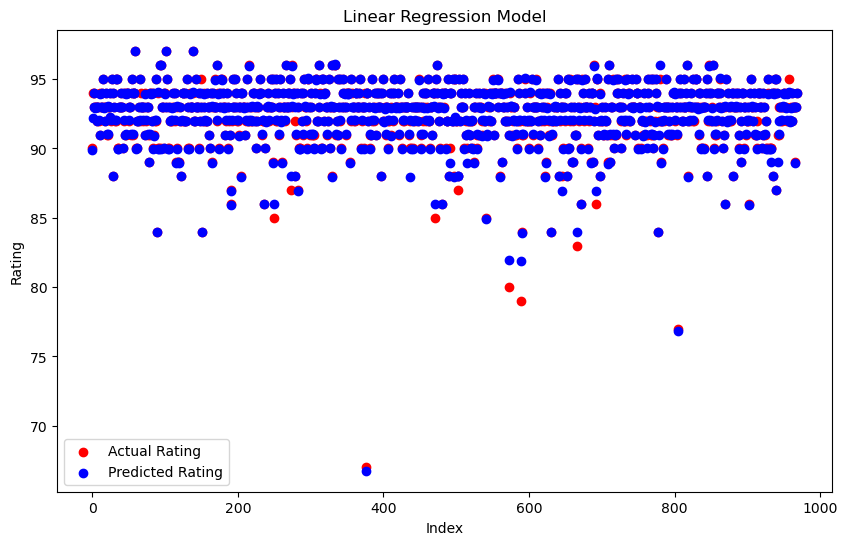

In [91]:
import matplotlib.pyplot as plt

# create a scatter plot with the actual and predicted values
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Rating')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Rating')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Linear Regression Model')
plt.legend()
plt.show()




In [92]:
#ננסה עוד מודל ,כיוון שהתוצאות יצאו גבוהות ונרצה לודא אמינות 
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
model = RandomForestRegressor(n_estimators=100, random_state=45).fit(X, y)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9979769207055543


In [93]:
dfclean.corr()

,Actual,Predicted
Actual,1.000000,0.993715
Predicted,0.993715,1.000000


In [94]:
#ניתן לראות שהקאורלציה של רייטינג מול משתנים אחרים היא יחסית גבוהה . בעיקר בפלייבור . אפשר לעשות גם מטריצת עמודות לדבר הזה 

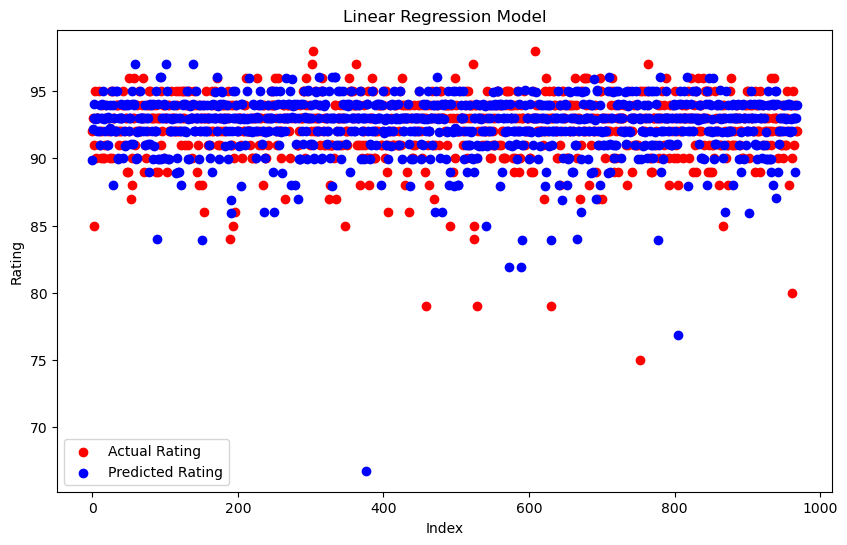

In [95]:
# create a scatter plot with the actual and predicted values
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Rating')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Rating')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Linear Regression Model')
plt.legend()
plt.show()
